<a href="https://colab.research.google.com/github/markoutsikou/DWS101-ML/blob/main/MLProject_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import os
import PIL
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas
import tensorflow
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import (Input, Conv2D, MaxPooling2D,Flatten, Dense, Dropout, BatchNormalization)
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

# **Question 1**


In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: dataset/Beagle/Beagle_1.jpg  
  inflating: dataset/Beagle/Beagle_10.jpg  
  inflating: dataset/Beagle/Beagle_100.jpg  
  inflating: dataset/Beagle/Beagle_11.jpg  
  inflating: dataset/Beagle/Beagle_12.jpg  
  inflating: dataset/Beagle/Beagle_13.jpg  
  inflating: dataset/Beagle/Beagle_14.jpg  
  inflating: dataset/Beagle/Beagle_15.jpg  
  inflating: dataset/Beagle/Beagle_16.jpg  
  inflating: dataset/Beagle/Beagle_17.jpg  
  inflating: dataset/Beagle/Beagle_18.jpg  
  inflating: dataset/Beagle/Beagle_19.jpg  
  inflating: dataset/Beagle/Beagle_2.jpg  
  inflating: dataset/Beagle/Beagle_20.jpg  
  inflating: dataset/Beagle/Beagle_21.jpg  
  inflating: dataset/Beagle/Beagle_22.jpg  
  inflating: dataset/Beagle/Beagle_23.jpg  
  inflating: dataset/Beagle/Beagle_24.jpg  
  inflating: dataset/Beagle/Beagle_25.jpg  
  inflating: dataset/Beagle/Beagle_26.jpg  
  inflating: dataset/Beagle/Beagle_27.jpg  
  inflating: dataset/Beagle/Beagle_28.jpg  
  inflating

# **Question 2**

In [38]:
IMG_SIZE = 64
data = []
labels = []

classes = os.listdir("dataset")
num_classes = len(classes)

for i, cls in enumerate(classes):
    path = os.path.join("dataset", cls)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        data.append(image)
        labels.append(i)

X = np.array(data) / 255.0
y = to_categorical(labels, num_classes)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# **Question 3**

In [39]:
mlp = Sequential([
    Input(shape=(64, 64, 3)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# **Question 4**

In [40]:
mlp.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_mlp = mlp.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.1194 - loss: 8.1105 - val_accuracy: 0.1237 - val_loss: 3.4248
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.2520 - loss: 2.5259 - val_accuracy: 0.3814 - val_loss: 1.8328
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.4460 - loss: 1.6686 - val_accuracy: 0.4897 - val_loss: 1.7118
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.5938 - loss: 1.4040 - val_accuracy: 0.4639 - val_loss: 1.7071
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 132ms/step - accuracy: 0.5732 - loss: 1.3288 - val_accuracy: 0.5103 - val_loss: 1.5525
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.6966 - loss: 1.0526 - val_accuracy: 0.5876 - val_loss: 1.4473
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7499 - loss: 0.8789 - val_accuracy: 0.7371 - val_loss: 0.9609
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8841 - loss: 0.5742 - val_accuracy: 0.7268 

# **Question 5**

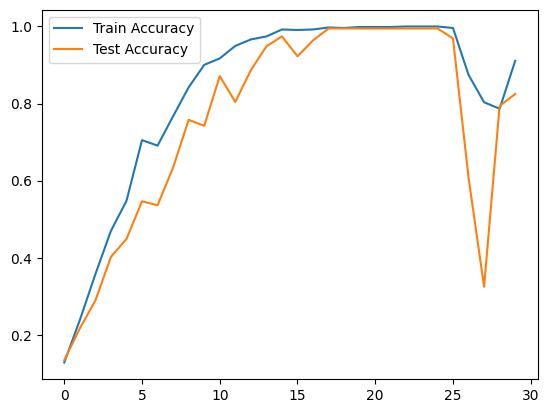

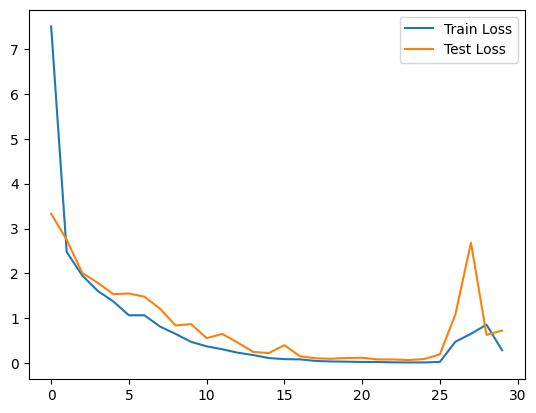

In [20]:
plt.plot(history_mlp.history['accuracy'], label='Train Accuracy')
plt.plot(history_mlp.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.show()

plt.plot(history_mlp.history['loss'], label='Train Loss')
plt.plot(history_mlp.history['val_loss'], label='Test Loss')
plt.legend()
plt.show()

# **Question 6**

In [23]:
cnn = Sequential([
    Input(shape=(64, 64, 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    BatchNormalization(),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# **Question 7**

In [24]:
cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history_cnn = cnn.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=32
)

Epoch 1/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 272ms/step - accuracy: 0.1880 - loss: 3.7203 - val_accuracy: 0.1753 - val_loss: 2.2808
Epoch 2/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 300ms/step - accuracy: 0.4216 - loss: 1.7203 - val_accuracy: 0.1031 - val_loss: 2.2766
Epoch 3/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.6191 - loss: 1.1617 - val_accuracy: 0.0619 - val_loss: 2.3187
Epoch 4/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.7493 - loss: 0.7649 - val_accuracy: 0.0928 - val_loss: 2.2264
Epoch 5/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 252ms/step - accuracy: 0.7789 - loss: 0.6360 - val_accuracy: 0.1082 - val_loss: 2.3072
Epoch 6/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 308ms/step - accuracy: 0.8169 - loss: 0.5130 - val_accuracy: 0.1495 - val_loss: 2.2600
Epoch 7/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.8309 - loss: 0.4761 - val_accuracy: 0.1443 - val_loss: 2.6758
Epoch 8/30
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 278ms/step - accuracy: 0.9046 - loss: 0.3315 - val_accuracy: 

Το CNN είναι καλύτερο γιατί εκμεταλλεύεται τα τοπικά χωρικά χαρακτηριστικά, κάνει ιεραρχική εξεαγωγή χαρακτηριστικών και έχει λιγότερες παραμέτρους λόγω των βαρών και έχει ανθεκτικότητα στις μετατοπίσεις. Άρα γενικεύει καλύτερα και δεν κάνει τόσο εύκολα overfitting.

# **Question 8**

In [26]:
datagen = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

datagen.fit(X_train)